In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Read training data

In [2]:
# reading training data
trainingData = pd.read_csv("/kaggle/input/titanic/train.csv")
# printing first 5 columns to view data
trainingData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Visualization

* Pclas vs Survived

Text(0, 0.5, 'Survived')

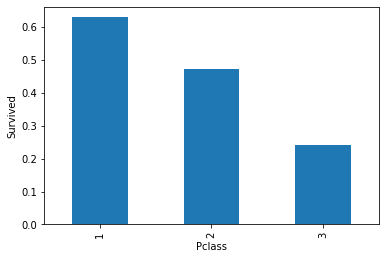

In [3]:
import matplotlib.pyplot as plt
plt = trainingData[['Pclass', 'Survived']].groupby('Pclass').mean().Survived.plot(kind='bar')
plt.set_xlabel('Pclass')
plt.set_ylabel('Survived')

* Sex vs Survived

Text(0, 0.5, 'Survived')

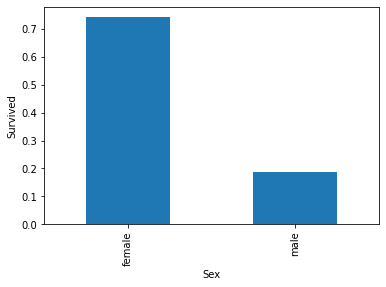

In [4]:
plt = trainingData[['Sex', 'Survived']].groupby('Sex').mean().Survived.plot(kind='bar')
plt.set_xlabel('Sex')
plt.set_ylabel('Survived')

* Embarked vs Survived

Text(0, 0.5, 'Survived')

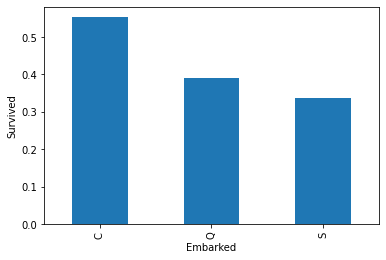

In [5]:
plt = trainingData[['Embarked', 'Survived']].groupby('Embarked').mean().Survived.plot(kind='bar')
plt.set_xlabel('Embarked')
plt.set_ylabel('Survived')

* Parch vs Survived

Text(0, 0.5, 'Survival Probability')

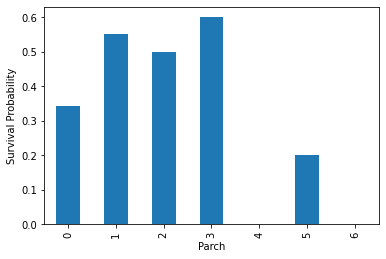

In [6]:
plt = trainingData[['Parch', 'Survived']].groupby('Parch').mean().Survived.plot(kind='bar')
plt.set_xlabel('Parch')
plt.set_ylabel('Survival Probability')

* SibSp vs Survived

Text(0, 0.5, 'Survival Probability')

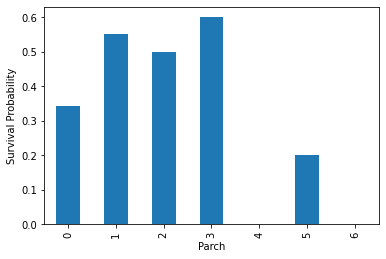

In [7]:
plt = trainingData[['Parch', 'Survived']].groupby('Parch').mean().Survived.plot(kind='bar')
plt.set_xlabel('Parch')
plt.set_ylabel('Survival Probability')

**Conclusions:**
* The passengers having one sibling/spouse has more survival probability.
* C > Q > S in terms of survival probability
* Females are more likely to survive
* 1st class has high chance of surviving than the other two classes.
* The passengers having three children/parents has more survival probability.

# **Preprocessing & Feature Engineering**

* finding and locating null values

In [8]:
# checking the number of null values per column
trainingData.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# checking the % of null values per column
(trainingData.isna().sum()/len(trainingData)) *100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

* For the age column, we can view the box plot of the data in order to decide the value that we'll to fill the null valued cells

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age'>

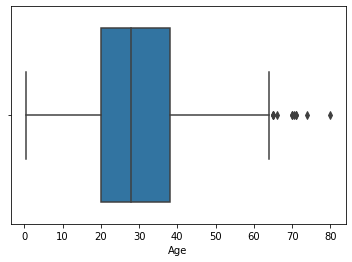

In [10]:
import seaborn as sns
sns.boxplot(trainingData.Age)

* since the data is skewed, it's better to use either the mode or median instead of using the mean

In [11]:
# for the age column, we'll fill the missing cells with mode value
trainingData['Age'].fillna(trainingData['Age'].mode()[0], inplace=True)

* dropping the cabin column (77% empty) and other columns (PassengerID, Name, Ticket) that won't be used in training

In [12]:
trainingData.drop(labels=['Ticket', 'PassengerId', 'Cabin', 'Name'],axis=1,inplace=True)
trainingData.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


* converting categorial data (Sex and Embarked columns) to numerical

In [13]:
trainingData['Sex'] = trainingData['Sex'].map({'male':0, 'female':1})
trainingData['Embarked'] = trainingData['Embarked'].map({'C':0, 'Q':1, 'S':2})
trainingData.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,2.0
1,1,1,1,38.0,1,0,71.2833,0.0
2,1,3,1,26.0,0,0,7.9250,2.0
3,1,1,1,35.0,1,0,53.1000,2.0
4,0,3,0,35.0,0,0,8.0500,2.0


* For the 2 empty Embarked cells, we'll fill them with the majority class

Text(0, 0.5, 'Passengers nb')

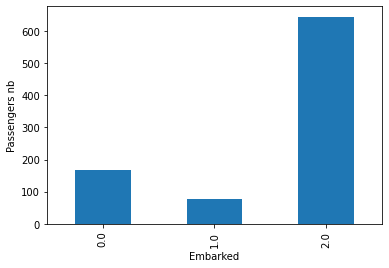

In [14]:
plt = trainingData.Embarked.value_counts().sort_index().plot(kind='bar')
plt.set_xlabel('Embarked')
plt.set_ylabel('Passengers nb')

The majority class is 2 (S)

In [15]:
trainingData['Embarked'].fillna(2, inplace=True)

# Training Data
We'll start by using all the left features (Pclass, Sex, Age, SibSp, Parch, Fare, Embarked), then we can further tune the features

In [16]:
# defining X and y
y = trainingData.Survived
# X is all the filtered columns except Survived column
X = trainingData.loc[:, trainingData.columns != 'Survived']
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,2.0
1,1,1,38.0,1,0,71.2833,0.0
2,3,1,26.0,0,0,7.9250,2.0
3,1,1,35.0,1,0,53.1000,2.0
4,3,0,35.0,0,0,8.0500,2.0


# Training Model 
**Random Forest Classifier**

* without cross-validation

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# splitting data for score calculation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

rfModel = RandomForestClassifier(random_state=1)
rfModel.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

**Model Evaluation**

In [18]:
rfModel.score(X_test, y_test)

0.8208955223880597

* With parameters tuning (cross-validation)

In [19]:
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

# training model
rfModel = RandomForestClassifier()

# selecting parameters to tune
parameters = [{'n_estimators': [100, 150, 200],
           'max_depth': [5, 7, 10, None],
           'min_samples_split': [2, 5, 10]}]

# tuning hyperparameters using GridSearchCV (cross-validation)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5)
rfModelCV = GridSearchCV(rfModel, parameters, cv=cv, n_jobs=-1)
# no need to split the data
rfModelCV.fit(X, y)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=5, random_state=None),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid=[{'max_depth': [5, 7, 10, None],
                          'min_samples_split': [2, 5, 10],
                          'n_estimators': [100, 150, 200]}])

showing best parameters (resulted from the cross validation)

In [20]:
rfModelCV.best_params_

{'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}

**Model Evaluation**

In [21]:
rfModelCV.best_score_

0.8280698010168852

# Feature Tuning

* used features

In [22]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked']

* calculating each feature's importance

In [23]:
featuresImportance = pd.Series(rfModelCV.best_estimator_.feature_importances_,index=features).sort_values(ascending=False)
featuresImportance

Sex         0.338706
Fare        0.230385
Age         0.186287
Pclass      0.112253
SibSp       0.053859
Parch       0.042338
Embarked    0.036172
dtype: float64

* visualizing featuresImportance 

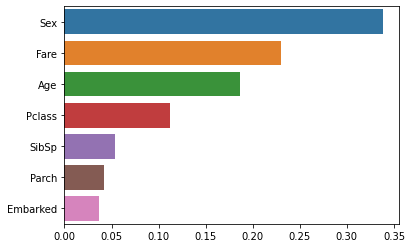

In [24]:
sns.barplot(x=featuresImportance, y=featuresImportance.index)
plt.legend()

* retraining model after leaving out least importance features

In [25]:
# droping least important features from X
X.drop(labels=['Embarked', 'Parch', 'SibSp'],axis=1,inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [26]:
# retraining the model
rfModelCV.fit(X, y)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=5, random_state=None),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid=[{'max_depth': [5, 7, 10, None],
                          'min_samples_split': [2, 5, 10],
                          'n_estimators': [100, 150, 200]}])

**Model Evaluation**

In [27]:
# Showing model accuracy
rfModelCV.best_score_

0.8392806477936099

# Model Evaluation
(rounded scores)
* Model accuracy without CV: 82%
* Model accuracy with CV: 83%
* Model accuracy after feature tuning: 84%

# **Reading & Reformatting test.csv file**

In [28]:
# reading test.csv
testData = pd.read_csv("/kaggle/input/titanic/test.csv")
testData.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


* cleaning test data

In [29]:
testData.drop(labels=['Ticket', 'PassengerId', 'Cabin', 'Name','Parch', 'SibSp', 'Embarked'], axis=1, inplace=True)
testData['Sex'] = testData['Sex'].map({'male':0, 'female':1})

* finding null values

In [30]:
(testData.isna().sum()/len(testData)) *100

Pclass     0.000000
Sex        0.000000
Age       20.574163
Fare       0.239234
dtype: float64

* subtituting null values with mode value in Age column

In [31]:
testData['Age'] = testData['Age'].fillna(testData['Age'].mode()[0])

* subtituting null values with interpolated value in Fare column

In [32]:
testData['Fare'] = testData['Fare'].fillna(testData['Fare'].interpolate())

# Generate Predictions

In [33]:
testPredictions = rfModelCV.predict(testData)
testPredictions

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

**Generating Submission file**

In [34]:
# to get passengerID column
testData = pd.read_csv("/kaggle/input/titanic/test.csv")

# submission file
output = pd.DataFrame({'PassengerId': testData.PassengerId,
                       'Survived': testPredictions})
# save file
output.to_csv('submission.csv', index=False)